<a href="https://colab.research.google.com/github/nsalazard/BICHIN/blob/main/grafo_bichines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install igraph
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 5.1 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
libgif-dev is already the newest version (5.1.4-2ubuntu0.1).
libgif-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc
The following NEW packages will be installed:
  libcairo-script-interpreter2 libcairo2-dev libpixman-1-dev libxcb-shm0-dev
0 upgraded, 4 newly installed, 0 to remove and 11 not upgraded.
Need to get 930 kB of archives.
After this operation, 3,986 kB of additional di

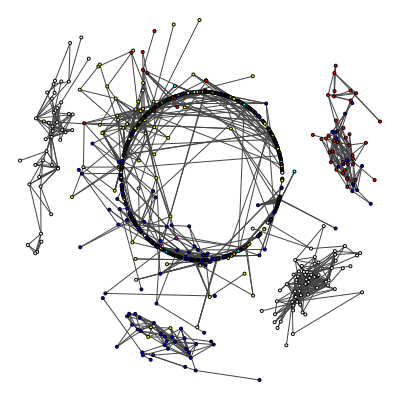

In [ ]:
import igraph as ig
import pandas as pd



nodes = pd.read_csv('./Nodos500.csv')
edges = pd.read_csv('./Edges500.csv') #Importar datos
g = ig.Graph.TupleList(edges.values,directed=False, #Forma tuplas con las conexiones de los nodos, e indica si usar flechas
                       edge_attrs=edges.columns[2:])#Guarda los atributos extras (peso,tipo,etc)

nodes_df = nodes.set_index(['id'])

for column in nodes_df:   
    g.vs[column] = nodes_df.loc[g.vs['name'],column] #g.vs guarda los atributos relacionados con los vertices (nodos)
                                                     #El atributo es el gen-dominante en este caso (Se pueden agregar mas)



vertex_type_dict = {"F": "blue", "L1": "yellow", "L2": "red","L3":"green","B":"black","R3":"cyan","R2":"magenta","R1":"white"} #Colores asignados a los genes
visual_style = {}

visual_style["vertex_size"] = 3 #tamano nodo
visual_style["vertex_color"] = [vertex_type_dict[type_label] for type_label in g.vs["gen_predominante"]] #asignar color
#visual_style["vertex_label"] = g.vs["name"] #nombre de los nodos
visual_style["edge_width"] = [weight/50 for weight in g.es['weight']]
visual_style["bbox"] = (400, 400)
visual_style["margin"] = 20
lay = g.layout("kk")

ig.plot(g, "Graph_color.png", **visual_style,layout=lay)
